In [1]:
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

元画像

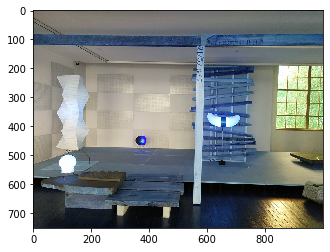

In [2]:
img = cv2.imread('images/noguchi01.jpg')
# show image with matplotlib
plt.imshow(img)

表示関数

In [48]:
def display_img(image, title):
    img = cv2.imread('images/noguchi01.jpg')
    plt.figure(figsize=(10,10),dpi=200)
    plt.subplot(121),plt.imshow(img),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(image),plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def display_img_gray(image, title):
    img = cv2.imread('images/noguchi01.jpg')
    gray_img  = cv2.cvtColor(cv2.GaussianBlur(img, (7,7), 0), cv2.COLOR_BGR2GRAY)
    plt.figure(figsize=(10,10),dpi=200)
    plt.subplot(121),plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(image, cmap='gray'),plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

1. カラー画像を白黒画像に変換しましょう．

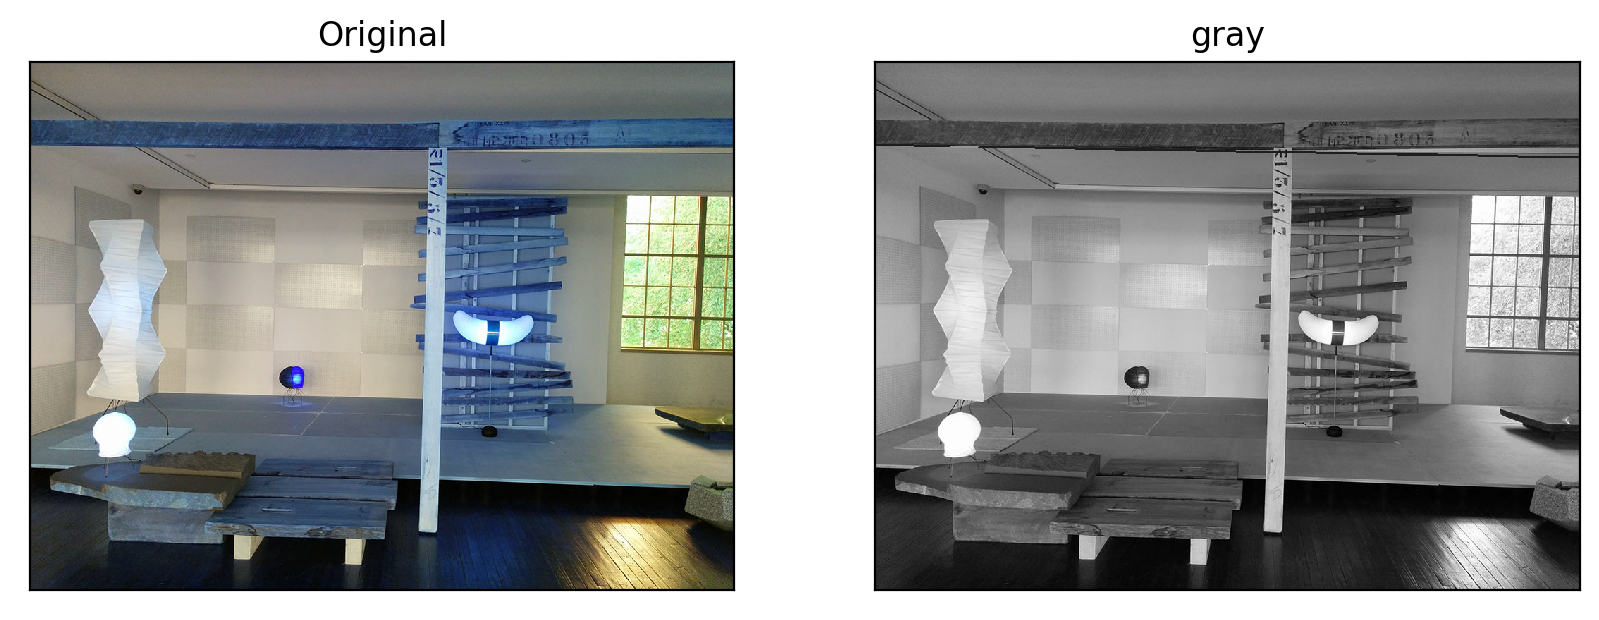

In [78]:
# convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# have to convert grayscale back to RGB for plt.imshow()
display_img(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB), 'gray')

2. 平滑化
 - Gaussian filter

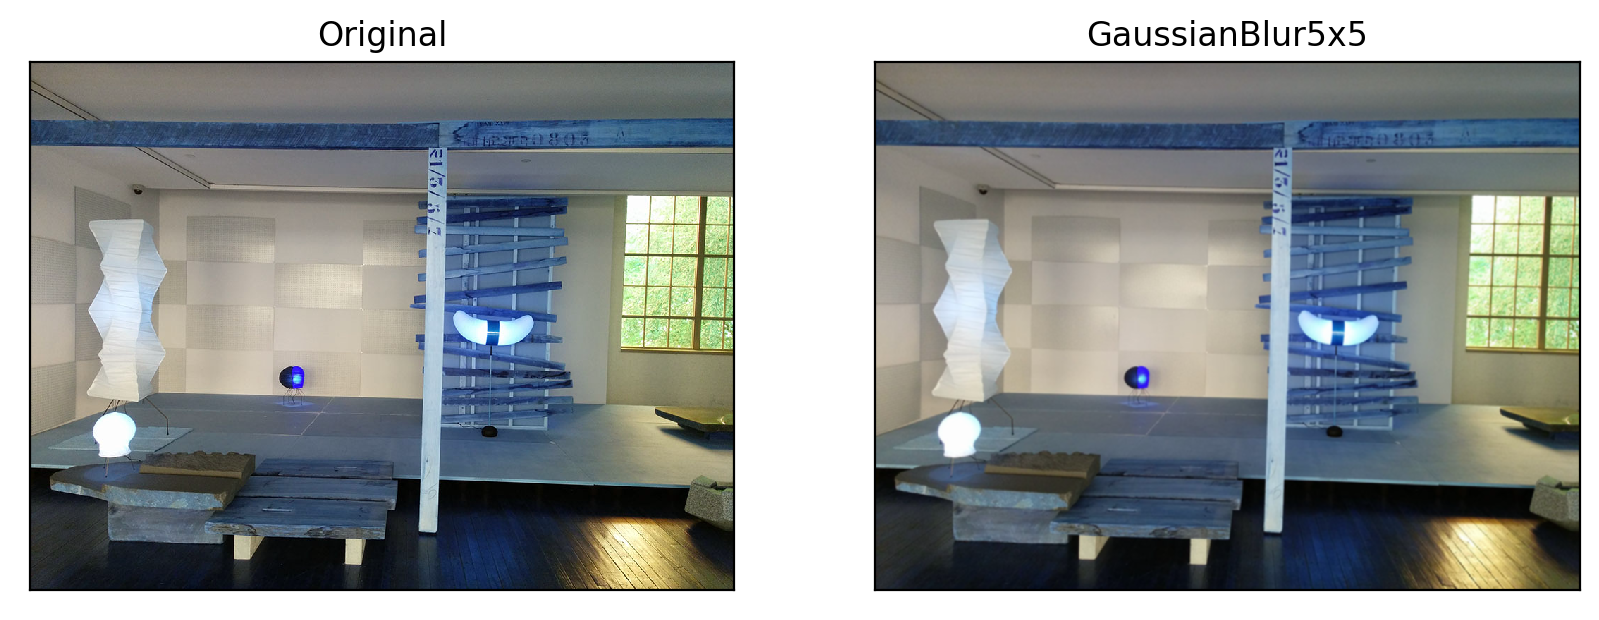

In [34]:
img_blur_small = cv2.GaussianBlur(img, (5,5), 0)

display_img(img_blur_small, 'GaussianBlur5x5')

2. 平滑化
 - Median filter

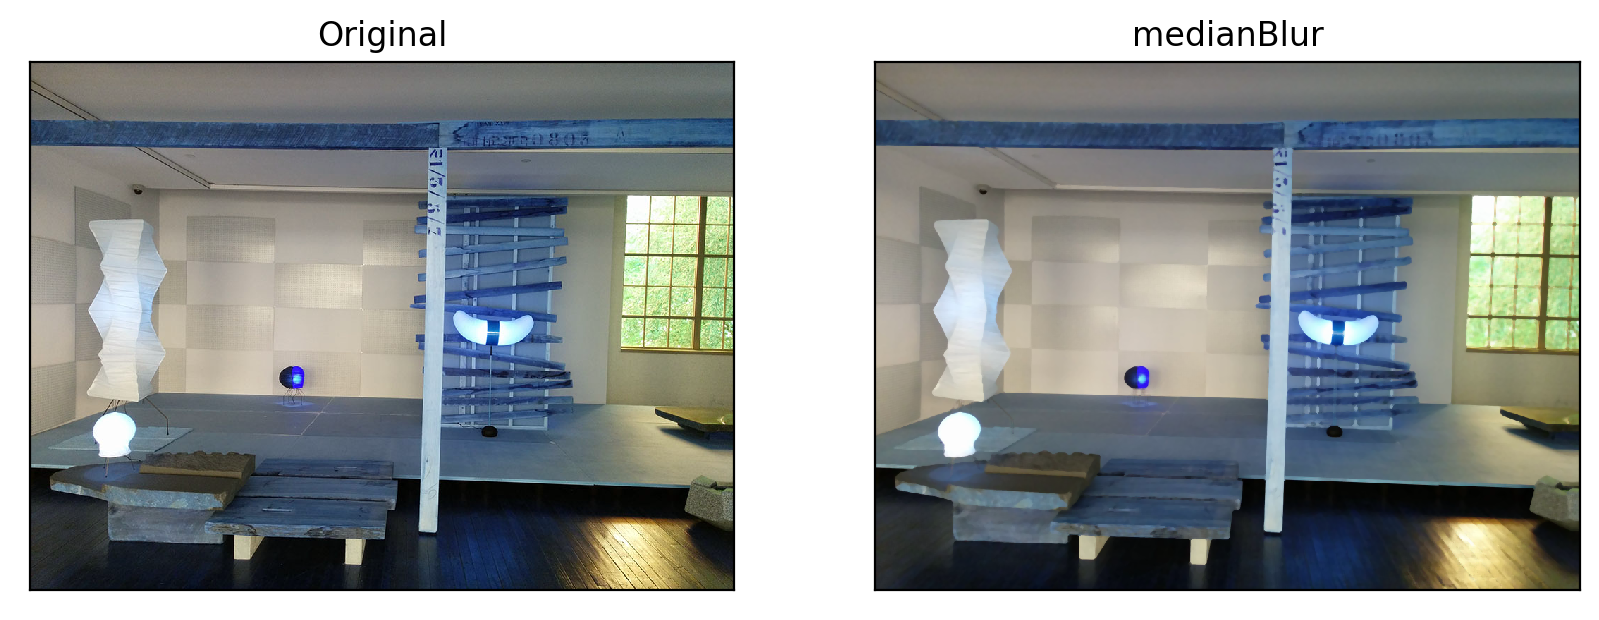

In [36]:
median = cv2.medianBlur(img,5)
display_img(median, 'medianBlur')

2. 平滑化
 - Bilateral filter

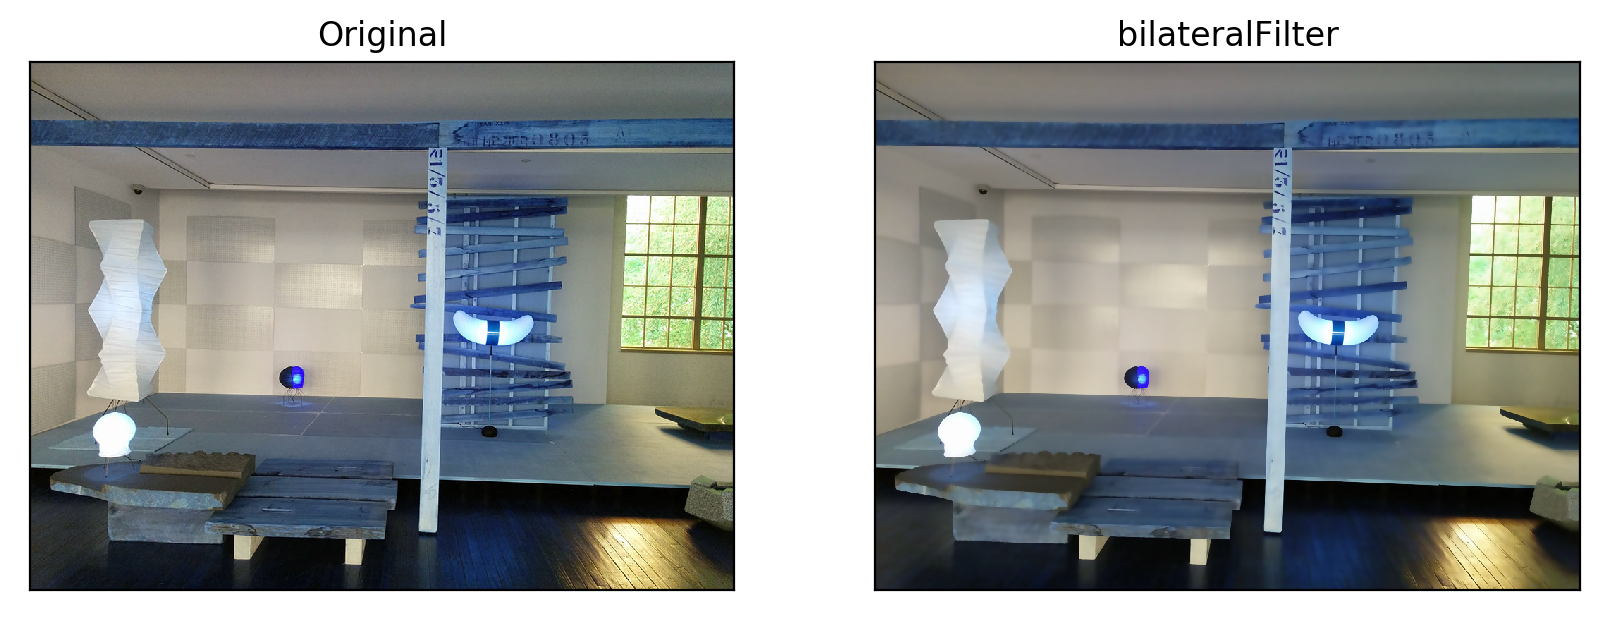

In [37]:
blur = cv2.bilateralFilter(img,9,75,75)
display_img(blur, 'bilateralFilter')

3. エッジ抽出
 - Sobel

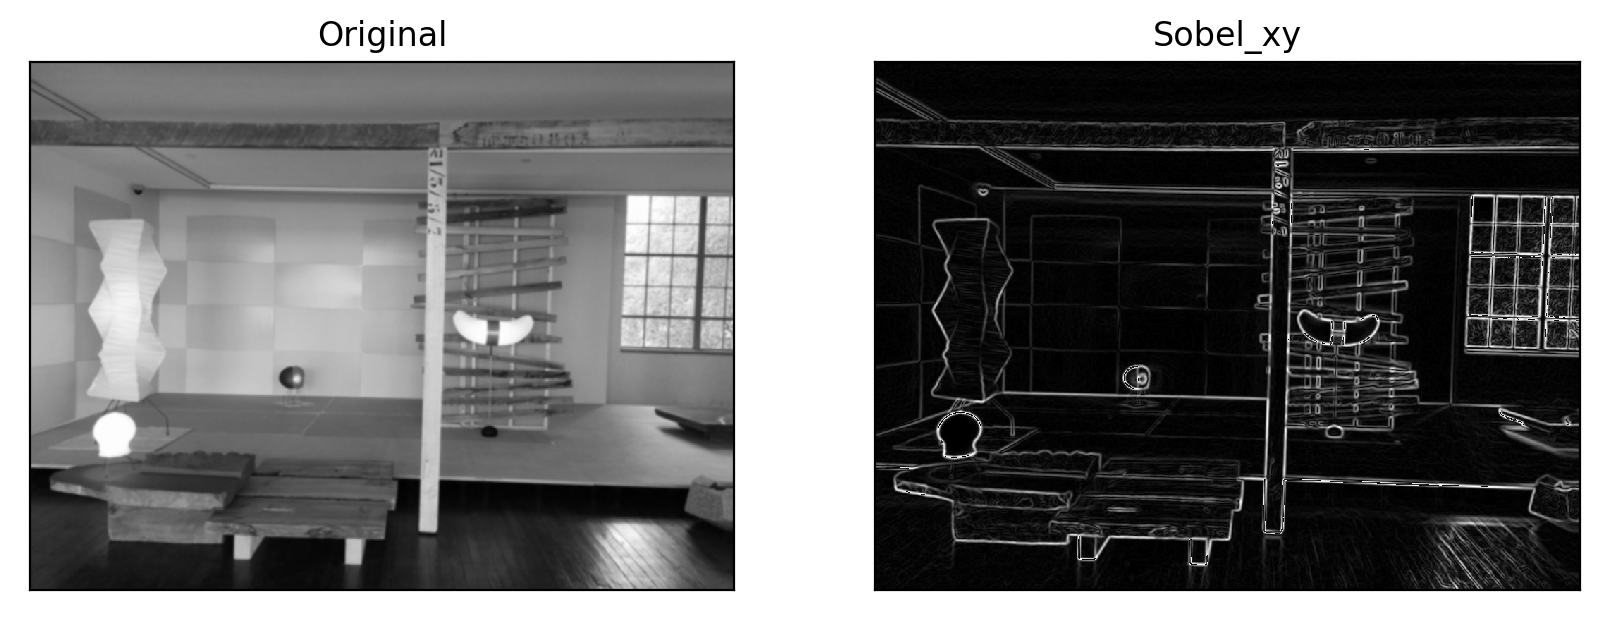

In [74]:
# preprocess by blurring and grayscale
gray_img  = cv2.cvtColor(cv2.GaussianBlur(img, (7,7), 0), cv2.COLOR_BGR2GRAY)

gray_x = cv2.Sobel(gray_img, cv2.CV_32F, 1, 0, ksize=3)
gray_y = cv2.Sobel(gray_img, cv2.CV_32F, 0, 1, ksize=3)
sobel = np.sqrt(gray_x ** 2 + gray_y ** 2)
sobel = np.uint8(np.abs(sobel))

display_img_gray(sobel, 'Sobel_xy')

3. エッジ抽出
 - Laplacian

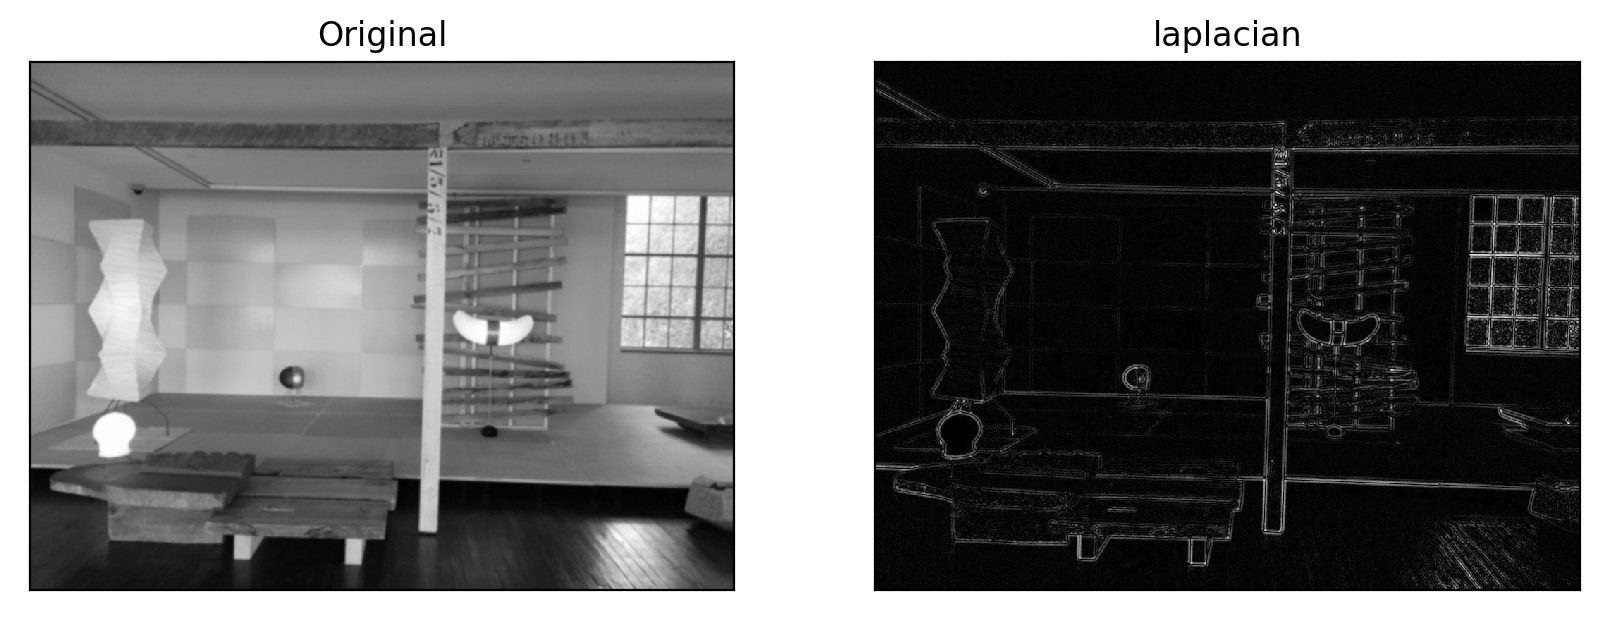

In [73]:
laplacian = cv2.Laplacian(gray_img, cv2.CV_64F , ksize=3)
laplacian = np.uint8(np.abs(laplacian))

display_img_gray(laplacian, 'laplacian')

3. エッジ抽出
 - Canny

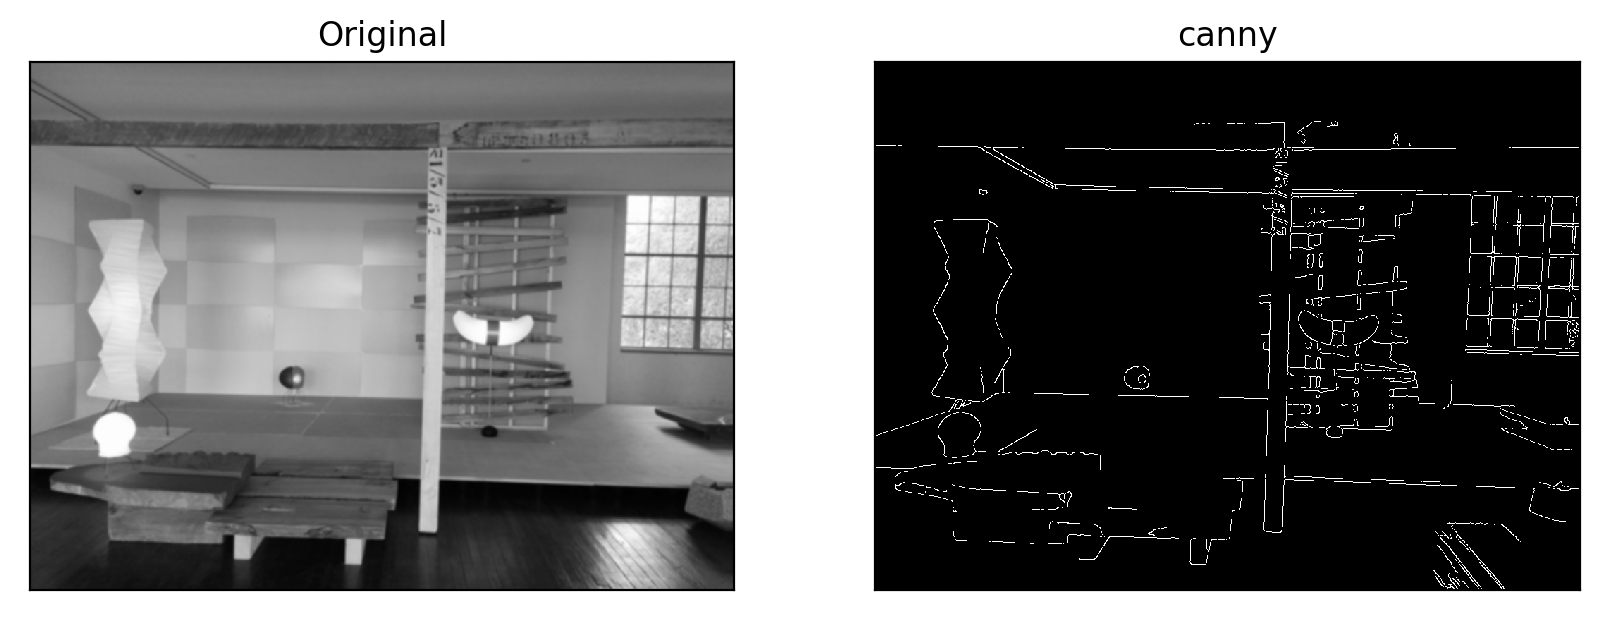

In [75]:
canny = cv2.Canny(gray_img, threshold1=50, threshold2=150)

display_img_gray(canny, 'canny')

4. 直線抽出
 - normal

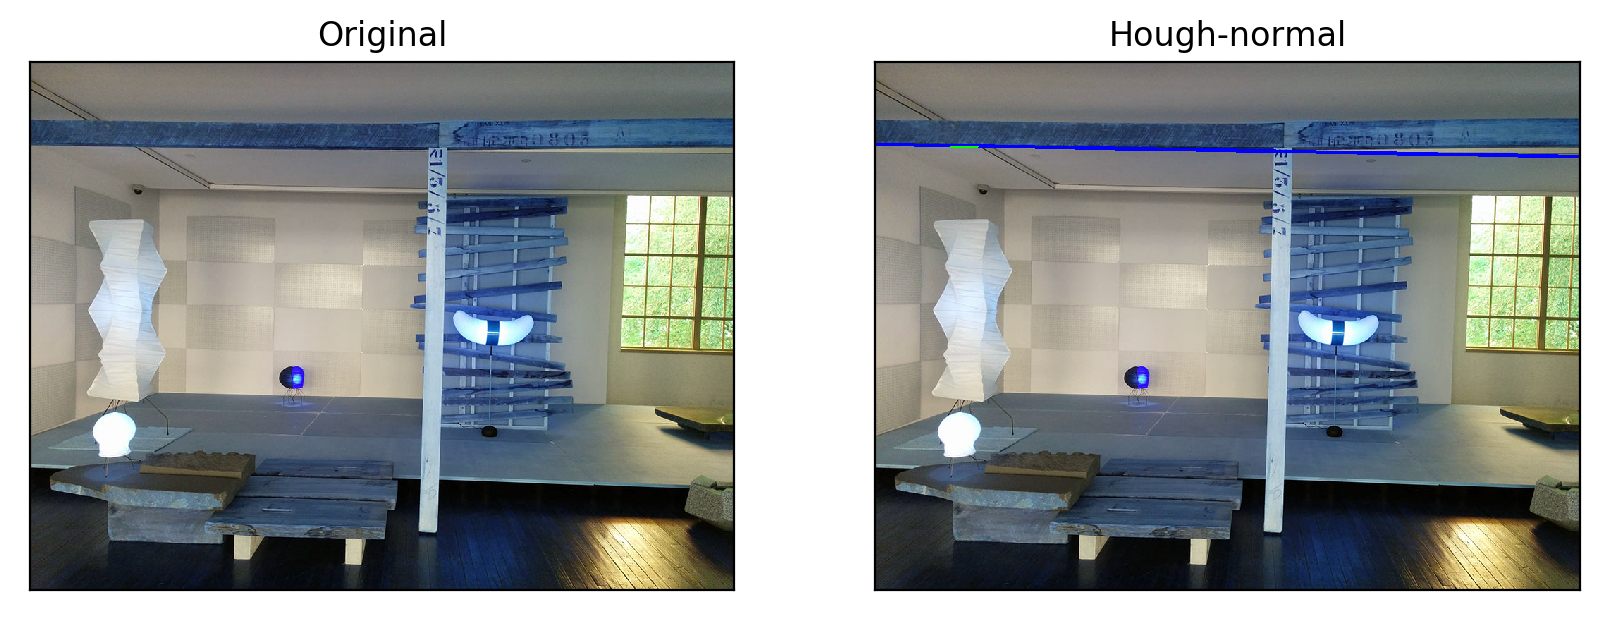

In [83]:
drawing_img = img

edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,60)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(drawing_img,(x1,y1),(x2,y2),(0,0,255),2)

display_img(drawing_img, 'Hough-normal')

4. 直線抽出
 - probabilistic

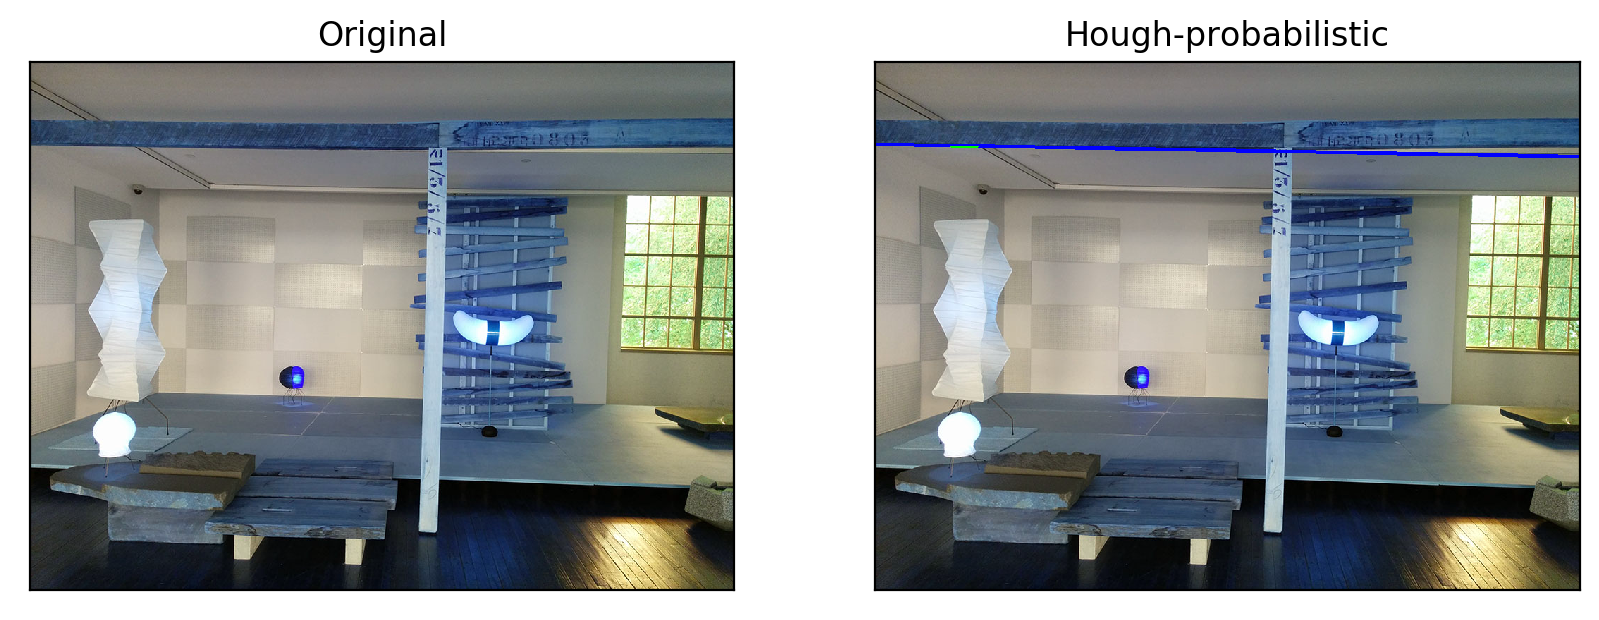

In [84]:
drawing_img = img

edges = cv2.Canny(gray_img,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,60)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(drawing_img,(x1,y1),(x2,y2),(0,255,0),2)

display_img(drawing_img, 'Hough-probabilistic')

5. 輪郭線抽出
 - Snake

       - B4-2a-snake.ipynbに記述

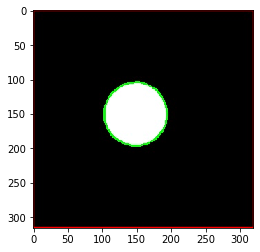

In [4]:
img_snake = cv2.imread('images/result-snake.jpg')
plt.imshow(img_snake)

6. 顔検出
 - cvHarrDetectObjects

-1

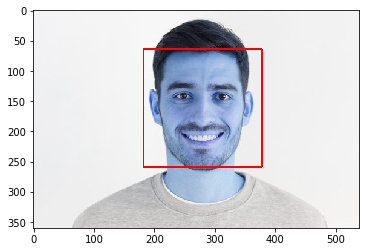

In [4]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('images/haarcascade_frontalface_default.xml')
# Read the input image
img = cv2.imread('images/frontface.jpg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the output
plt.imshow(img)
cv2.waitKey()

7. 領域分割
 - k-means法(色のみ)

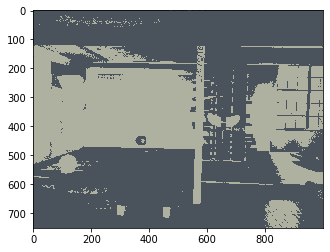

In [5]:
img_kmeans_c = img
Z = img_kmeans_c.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img_kmeans_c.shape))
plt.imshow(res2,cmap='gray')

7. 領域分割
 - k-means法(色+座標)

[[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]]
(750000, 5)
(750, 1000, 3)


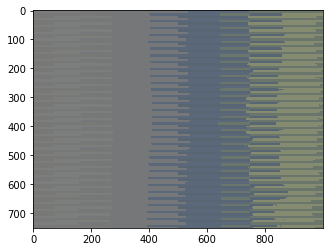

In [9]:
img_kmeans_cp = img
X = img_kmeans_cp.reshape((-1,3))
Y = np.tile(np.arange(img_kmeans_cp.shape[0]),(1,img_kmeans_cp.shape[1])).T
z = np.tile(np.arange(img_kmeans_cp.shape[1]),(1,img_kmeans_cp.shape[0])).T
Z = np.hstack((X,Y,z))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
print(label)
res = center[label.flatten()]
print(res.shape)
res2 = res.reshape(Z.shape)[:,:3].reshape(img_kmeans_cp.shape)
print(res2.shape)
plt.imshow(res2,cmap='gray')

7. 領域分割
 - meanshift(PyrMeanShiftFiltering)

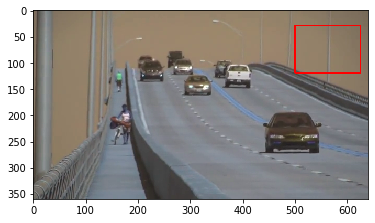

In [67]:
cap = cv2.VideoCapture('images/slow_traffic_small.mp4')

# take first frame of the video
ret,frame = cap.read()

# setup initial location of window
r,h,c,w = 250,90,400,125  # simply hardcoded the values
track_window = (c,r,w,h)

# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret ,frame = cap.read()

    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)

        # Draw it on image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        plt.imshow(img2)

        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite("images/slow"+chr(k)+".jpg",img2)

    else:
        break

cap.release()

In [63]:
print(ret)

False


7. 領域分割
 - watershed

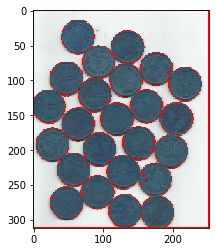

In [53]:
img = cv2.imread('images/water_coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(img)

8. ポアソンブレンディング

In [12]:
# Read images
src = cv2.imread("images/airplane.jpg")
dst = cv2.imread("images/sky.jpg")
# Create a rough mask around the airplane.
src_mask = np.zeros(src.shape, src.dtype)
poly = np.array([ [4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
cv2.fillPoly(src_mask, [poly], (255, 255, 255))
# This is where the CENTER of the airplane will be placed
center = (800,100)
# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.MIXED_CLONE)
# Save result
cv2.imwrite("images/belending.jpg", output);


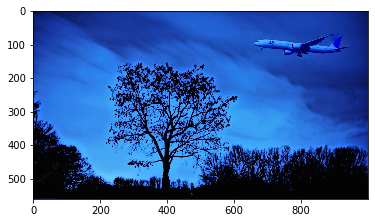

In [13]:
img_blend = cv2.imread('images/belending.jpg')
plt.imshow(img_blend)

9. 他のサンプルコードで，面白そうなのがあれば試してみて下さい

10. Pytorch課題の課題３，課題４
 - 課題３

kadai2-3pt.ipynbに記載

10. Pytorch課題の課題３，課題４
 - 課題4

kadai2-4pt.ipynbに記載

11. フレームワークを使わない深層学習
 - 第1回課題1

kadai1-1.ipynbに記載

11. フレームワークを使わない深層学習
 - 第1回課題2

kadai1-2.ipynbに記載